In [4]:
# %pip install matplotlib
%pip install pandas seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [8]:
# Load the data into DataFrames
conn = sqlite3.connect('../data/climate_data.db') # Connect to the SQLite database
greenhouse_gas = pd.read_sql_query("SELECT * FROM greenhouse_gas;", conn)
sea_ice = pd.read_sql_query("SELECT * FROM sea_ice;", conn)
conn.close()

In [9]:
sea_ice.columns = sea_ice.columns.str.strip() # Clean up column names in sea_ice DataFrame

# Preprocessing the sea_ice data to get yearly averages
sea_ice['Date'] = pd.to_datetime(sea_ice[['Year', 'Month', 'Day']])
sea_ice_yearly = sea_ice.groupby('Year').agg({'Extent': 'mean'}).reset_index()

# Merging the data on the 'year' column
merged_data = pd.merge(greenhouse_gas, sea_ice_yearly, left_on='year', right_on='Year', how='inner')

# Drop the redundant 'Year' column
merged_data.drop(columns=['Year'], inplace=True)



In [15]:
# Display the merged DataFrame and save it
display(merged_data.head())

,country_or_area,year,value,category,Extent
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,11.783311
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,11.710360
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,11.205268
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,10.992034
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,11.409092


In [16]:
print("Greenhouse Gas Data Summary:")
display(greenhouse_gas.describe())

Greenhouse Gas Data Summary:


,year,value
count,8406.000000,8.406000e+03
mean,2002.188437,2.055472e+05
std,7.151605,8.041504e+05
min,1990.000000,1.103750e-06
25%,1996.000000,2.976980e+02
50%,2002.000000,7.840318e+03
75%,2008.000000,6.589885e+04
max,2014.000000,7.422208e+06


In [17]:
print("Sea Ice Data Summary:")
display(sea_ice.describe())

Sea Ice Data Summary:


,Year,Month,Day,Extent,Missing,Date
count,18262.000000,18262.000000,18262.000000,18262.000000,18262.0,18262
mean,2002.000000,6.523053,15.729274,11.538756,0.0,2002-07-02 00:00:00.000000128
min,1990.000000,1.000000,1.000000,2.264000,0.0,1990-01-01 00:00:00
25%,1996.000000,4.000000,8.000000,7.606250,0.0,1996-04-01 06:00:00
50%,2002.000000,7.000000,16.000000,12.239000,0.0,2002-07-02 00:00:00
75%,2008.000000,10.000000,23.000000,15.095000,0.0,2008-09-30 18:00:00
max,2014.000000,12.000000,31.000000,20.201000,0.0,2014-12-31 00:00:00
std,7.211057,3.448764,8.800179,4.607077,0.0,NaN


In [18]:
print("Merged Data Summary:")
display(merged_data.describe())

Merged Data Summary:


,year,value,Extent
count,8406.000000,8.406000e+03,8406.000000
mean,2002.188437,2.055472e+05,11.535636
std,7.151605,8.041504e+05,0.239843
min,1990.000000,1.103750e-06,10.992034
25%,1996.000000,2.976980e+02,11.409092
50%,2002.000000,7.840318e+03,11.608627
75%,2008.000000,6.589885e+04,11.710360
max,2014.000000,7.422208e+06,11.892644


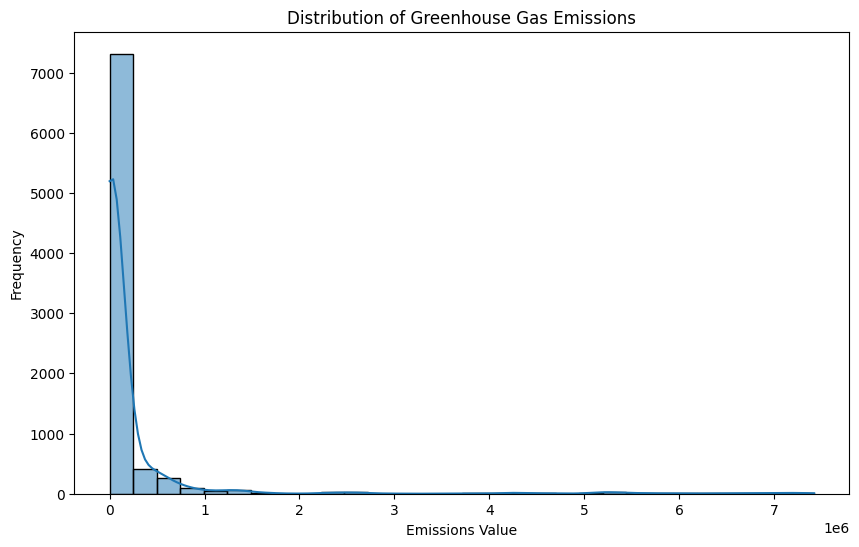

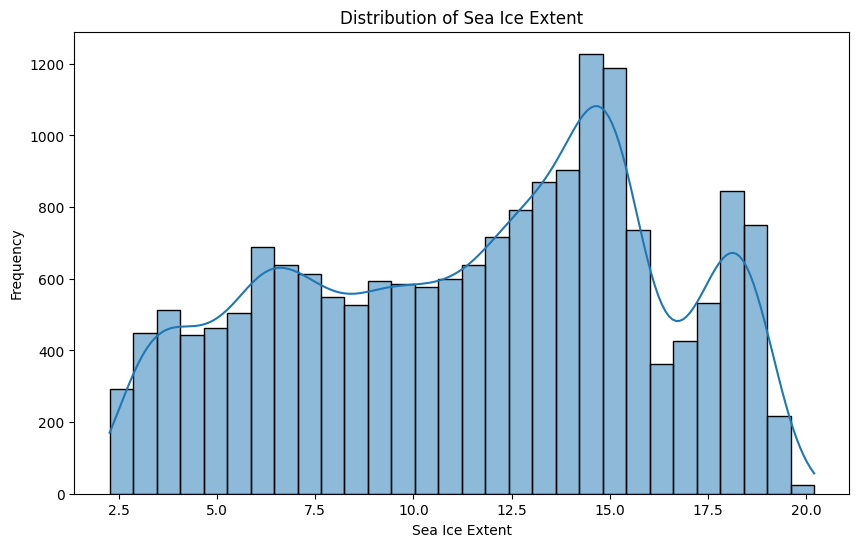

In [19]:
# Distribution Plots for both datasources
plt.figure(figsize=(10, 6))
sns.histplot(greenhouse_gas['value'], bins=30, kde=True)
plt.title('Distribution of Greenhouse Gas Emissions')
plt.xlabel('Emissions Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(sea_ice['Extent'], bins=30, kde=True)
plt.title('Distribution of Sea Ice Extent')
plt.xlabel('Sea Ice Extent')
plt.ylabel('Frequency')
plt.show()

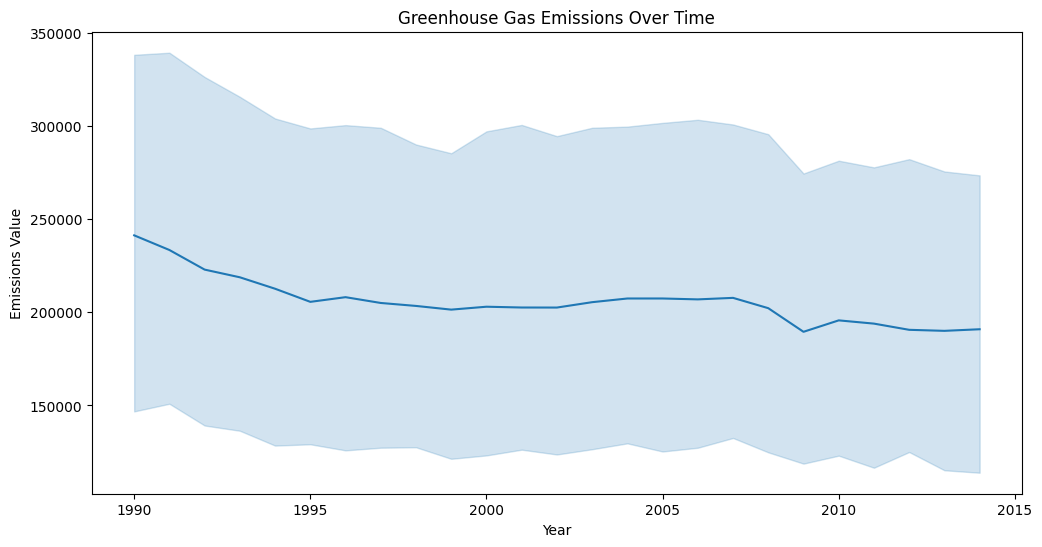

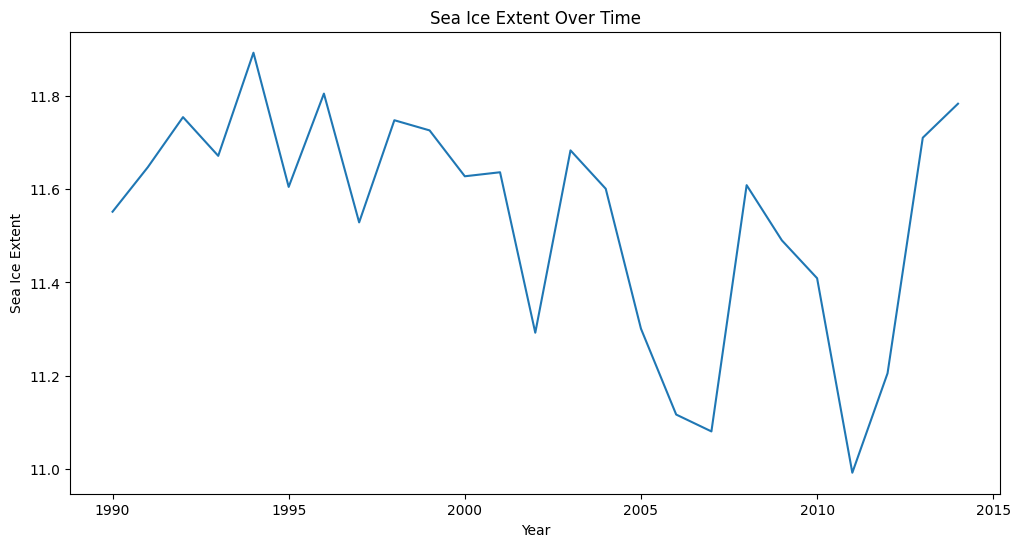

In [20]:
# Trend Analysis of both datasources
plt.figure(figsize=(12, 6))
sns.lineplot(data=greenhouse_gas, x='year', y='value')
plt.title('Greenhouse Gas Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions Value')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sea_ice_yearly, x='Year', y='Extent')
plt.title('Sea Ice Extent Over Time')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent')
plt.show()

In [21]:
# Correlation Analysis
correlation = merged_data[['value', 'Extent']].corr()
print("Correlation Analysis between Greenhouse Gas Emissions and Sea Ice Extent:")
display(correlation)

Correlation Analysis between Greenhouse Gas Emissions and Sea Ice Extent:


,value,Extent
value,1.000000,0.003249
Extent,0.003249,1.000000


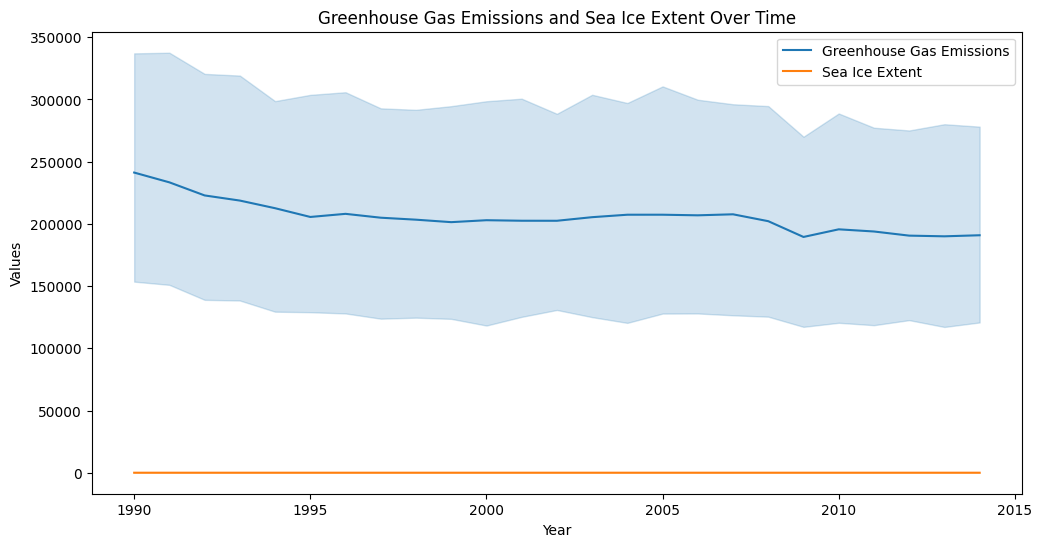

In [22]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='year', y='value', label='Greenhouse Gas Emissions')
sns.lineplot(data=merged_data, x='year', y='Extent', label='Sea Ice Extent')
plt.title('Greenhouse Gas Emissions and Sea Ice Extent Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

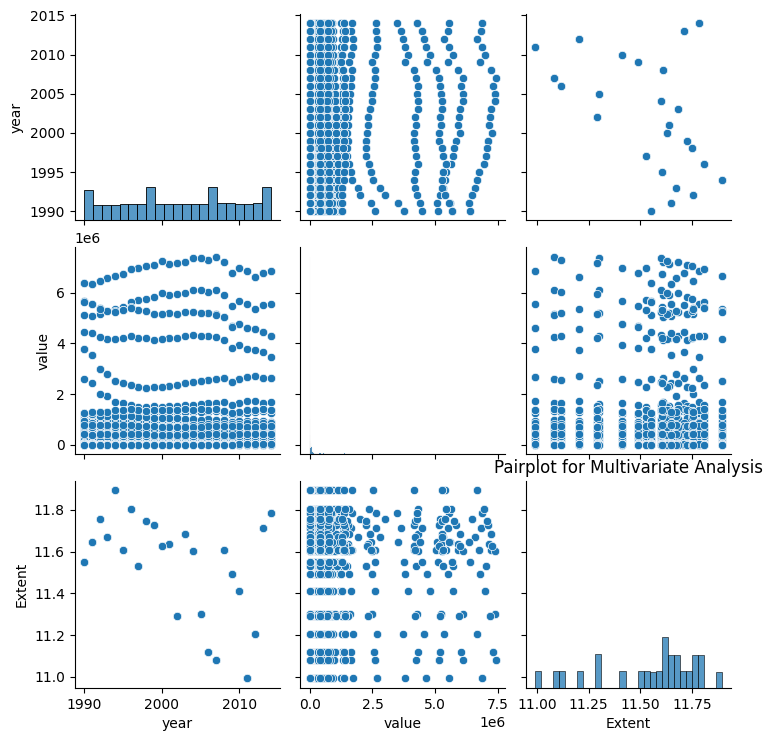

In [22]:
# Multivariate Analysis
sns.pairplot(merged_data[['year', 'value', 'Extent']])
plt.title('Pairplot for Multivariate Analysis')
plt.show()